In [1]:
### 03/08 update
### normalizes the error map

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy.stats import binned_statistic
import scipy.optimize as opt
mpl.rc('xtick', direction='in', top=True)
mpl.rc('ytick', direction='in', right=True)
mpl.rc('xtick.minor', visible=True)
mpl.rc('ytick.minor', visible=True)
plt.rcParams['font.size'] = 15
from mycolorpy import colorlist as mcp
%run Fraunhofer
%run ErrMask

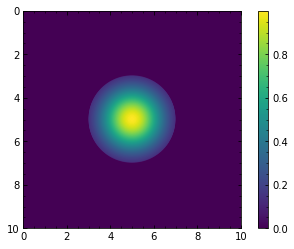

In [2]:
screen = {}
screen['N'] = 4096
screen['D'] = 10
Initialize(screen)
center = (screen['D']/2, screen['D']/2)
MultByGaussian(screen, center, 1.0)
InCircle(screen, center, 2.0)

ScreenFFT(screen)

lam = 0.002 #m wavelength
kphot = 2*np.pi/lam
thetamaxdeg = 3.0
thetamax = 2*np.pi/180. # 2 degrees in radians
theta_vec = np.linspace(-thetamax,thetamax,512) 
#II0 = Project_I_on_thetagrid(theta_vec,screen,lam) 
theta_vec = np.linspace(0, 2*thetamax, 512)


plt.imshow(screen['E'],extent=(0,screen['D'],screen['D'],0))
plt.colorbar()

In [11]:
def filter_WN(screen, A, k_in, k_out):
    """
    k_in, k_out: filter radius in the fourier space
    A = amplitude of error mask
    Returns the filtered WN in real space
    """
    N = screen['N']
    k = screen['kap'] # radius in k space
    # white noise
    WN = np.random.normal(0,1,(N,N))
    WN_FT = np.fft.fftshift(np.fft.fft2(np.fft.fftshift(WN)))
    #filter
    cut1 = np.where(k<k_in, 0, 1)
    cut2 = np.where(k>k_out, 0, 1)
    WN_FT_fil = WN_FT*cut1*cut2 # filtered WN in fourier space
    WN_fil = np.fft.fftshift(np.fft.ifft2(np.fft.fftshift(WN_FT_fil))) # filtered WN in real space
    return(WN_fil, WN_FT_fil) # complex
def rms(error_map):
    return np.sqrt(np.mean(error_map)**2)

(emap_E, emap_fft) = filter_WN(screen, 1.0, 10, 15) # generate error map in [m] space and in 
print('RMS error of the error map in meter space is {}'.format(rms(emap_E)))
print('RMS error of the error map in 1/meter space is {}'.format(rms(emap_fft)))
print(rms(emap_fft)**2/screen['dk'])
print(rms(emap_E)**2/(screen['D']/screen['N']))

RMS error of the error map in meter space is (1.0376153603865179e-20+0j)
RMS error of the error map in 1/meter space is (0.05103718122629998+2.8189256484623115e-18j)
(0.02604793867526187+2.877400383680724e-18j)
(4.4099405255067384e-38+0j)


In [4]:
### verify Parseval's theorem
dx = screen['D']/screen['N']
dk = screen['dk']
print(np.sum(np.abs(emap_E)**2/(dx**2))) # real space
print(np.sum(np.abs(emap_fft)**2/(dk**2))) # fourier space

1658024376.0134757
16580243760134.758


In [5]:
### verify Parseval's theorem
print(np.sum(abs(emap_E) ** 2))
print(np.sum(abs(emap_fft) ** 2 / emap_E.size))

39530.38158448876
39530.38158448877


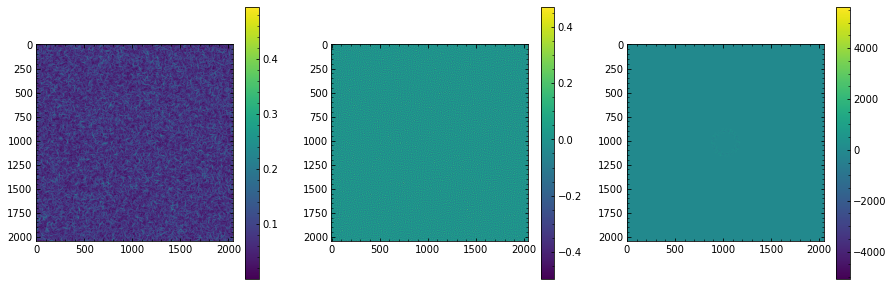

In [9]:

fig = plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.imshow(np.abs(emap_E))
plt.colorbar()
plt.subplot(1,3,2)
plt.imshow(np.real(emap_E))
plt.colorbar()
plt.subplot(1,3,3)
# plt.imshow(np.imag(emap))
plt.imshow(np.real(emap_fft))
#plt.xlim(900, 1200)
#plt.ylim(900, 1200)
plt.colorbar()


In [7]:
# bin the error map in 1/m space
bins = np.linspace(screen['kap'].min(), screen['kap'].max(),screen['N'])
f_flatten = screen['kap'].flatten() # frequency (1/m)
psd_flatten = (np.abs(emap_fft)**2).flatten() # power spectrum density in the fourier frequency (1/m) space. 
bin_psd, bin_edge, bin_num = binned_statistic(f_flatten, psd_flatten, statistic='mean', bins=bins) 


Text(0.5, 0, '1/m')

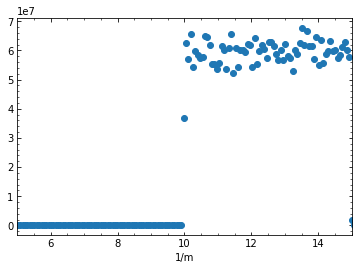

In [8]:
### ???
delta_f = np.diff(bin_edge)[0]
plt.plot(bin_edge[:-1], bin_psd/delta_f, 'o')
plt.xlim(5,15)
plt.xlabel('1/m')

In [5]:
def rms(x):
    return np.sqrt(np.mean(x**2))

noise is [-3.08119701  3.02387482  4.17832927 -1.17901524  3.89211514  0.07303789
 -0.90324451 -2.53281731 -0.67279647  0.98776216 -2.55996011 -1.65745804
 -3.31058046  0.73957386 -2.99396431 -7.40550364  4.25929193  0.23952122
 -0.44974278  1.33931048  0.30551793  3.77336777  2.29052393  0.09151822
 -0.13143558 -2.48828727 -2.09621507 -5.26760756 -2.54082613  1.07504495
 -4.03628939  2.23861435 -2.16676026 -1.90257693 -2.80699001 -4.65244288
  1.85954198  1.50717711 -0.48451694  2.09357025 -4.18506048 -8.03164544
  2.10113953  0.20811478  5.79476627 -1.42511898  0.19950165  0.22305609
  2.72428416  4.04225637 -0.90506838 -3.35941728  2.08287062 -2.07083412
 -1.55720222  0.3837991   0.96772935 -3.82926707  0.98064721 -2.78073004
  1.45256486 -1.84913823  1.4214145   2.43963841  2.59275143 -4.15336587
  3.20542664 -3.05210393 -1.8536312   0.49163548  0.31222284  2.73751735
  1.46112661 -3.72722039 -4.67265255 -7.22313817  1.82255607  2.84580196
  1.29646083 -1.72929898]
rms^2 is 8.36429

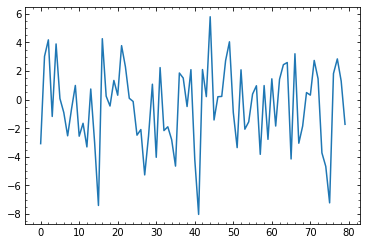

In [6]:
## test with 1D gaussian noise
t = np.linspace(0,20, 80)
noise = np.random.normal(0,3,80)
fft_noise = np.abs(sp.fft.fftshift(sp.fft.fft(sp.fft.fftshift(noise))))
df = 1/t.max()
n = len(t)
f = df*np.fft.fftfreq(n)*n
print('noise is', noise)
print('rms^2 is', rms(noise)**2)
print('t is', t)
print('f is', f)
plt.plot(noise)

## normalized noise: RMS^2 = sum(norm_noise)$\cdot\Delta f$
RMS in real space; norm_noise in k space

Total power under the normalized power spectrum (fft^2/df) is 8.364299314980654
RMS^2 is 8.36429931498065


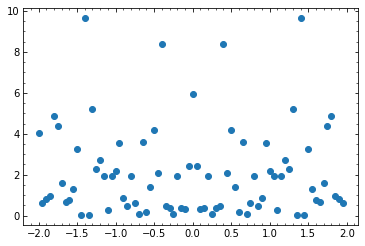

In [7]:
# fourier space
norm_fft = fft_noise**2/df/n**2 # normalize noise in k space by dividing it by N^2 and delta f (V^2/Hz)
#norm_fft_avg = np.mean(norm_fft_avg)        # (fft^2 / df) --> find the average of the normalized spectrum --> multiply this by the width of the frequency range to get the total power 
#total_Vf = norm_fft_avg * (f.max()-f.min())
#total_Vf = sp.integrate.simpson(norm_fft, dx=df)
total_Vf = np.sum(norm_fft)*df
print('Total power under the normalized power spectrum (fft^2/df) is', total_Vf)


# real space
rms_sq = rms(noise)**2 
#total_Vt = rms_sq * (t.max()-t.min()) # total power in real space
#print('Total power under the power spectrum in real space is', total_Vt)
print('RMS^2 is', rms_sq)

plt.plot(f, norm_fft, 'o')


8.259745573543395
2.091074828745163


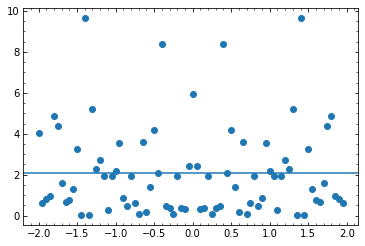

In [16]:
plt.plot(f,norm_fft,'o')
avg = np.mean(norm_fft)
plt.axhline(avg)
print(avg*(f.max()-f.min()))
print(avg)

# 03/09 measure error map in the fourier space

In [35]:
# redefine error map 
def filter_WN(screen, A, k_in, k_out):
    """
    k_in, k_out: filter radius in the fourier space
    A = amplitude of error mask
    Returns the filtered WN in real space
    """
    N = screen['N']
    k = screen['kap'] # radius in k space
    # white noise
    WN = np.random.normal(0,1,(N,N))
    WN_FT = np.fft.fftshift(np.fft.fft2(np.fft.fftshift(WN)))
    #filter
    cut1 = np.where(k<k_in, 0, 1)
    cut2 = np.where(k>k_out, 0, 1)
    WN_FT_fil = WN_FT*cut1*cut2 
    WN_fil = A * np.fft.fftshift(np.fft.ifft2(np.fft.fftshift(WN_FT_fil))) ### real space, added the error amplitude!!!
    return(WN_fil, WN_FT_fil) # complex
def rms(error_map):
    return np.sqrt(np.mean(error_map**2))

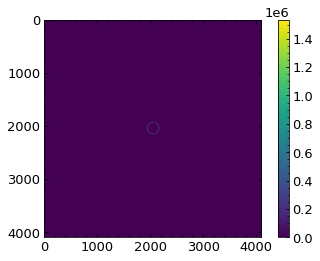

In [51]:
(emap_E, emap_k) = filter_WN(screen, 0.1, 10, 12) # generate error map in [m] space and in fourier space
emap_fft = np.fft.fftshift(np.fft.fft2(np.fft.fftshift(emap_E)))
plt.imshow(np.abs(emap_fft)**2)
plt.colorbar()

In [52]:
norm_fft = np.abs(emap_fft**2)/screen['dk']**2/screen['N']**4 # V^2/Hz^2
avg_fft = np.mean(norm_fft)
# print(avg_fft*(2*screen['kx'].max())**2)
total_Vf = np.sum(norm_fft)*screen['dk']**2
rms_sq = np.abs(rms(emap_E)**2)
print('sum of V^2/Hz^2',total_Vf)
print('RMS^2', rms_sq)
# need to integrate norm_fft in each dr (polar coordinates)

sum of V^2/Hz^2 8.262838282404732e-06
RMS^2 8.262838282404712e-06


Text(0, 0.5, 'Noise ($V^2/Hz$)')

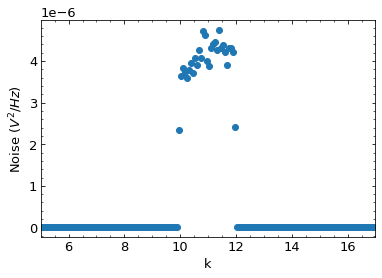

In [55]:
# turn fft to 1D 
# bin the error map in k space
bins = np.linspace(screen['kap'].min(), screen['kap'].max(),int(screen['N']))
f_flatten = screen['kap'].flatten() # frequency (1/m)
fft_flatten = norm_fft.flatten() # power spectrum density in the fourier frequency (1/m) space. 
bin_psd, bin_edge, bin_num = binned_statistic(f_flatten, fft_flatten, statistic='mean', bins=bins) 
#print(bin_psd)
plt.plot(bin_edge[:-1], bin_psd*2*np.pi*bin_edge[:-1], 'o')
plt.xlim(5,17)
plt.xlabel('k')
plt.ylabel(r'Noise ($V^2/Hz$)')

In [54]:
np.sum(bin_psd*2*np.pi*bin_edge[:-1]) * (bins[1]-bins[0])

8.236544502161769e-06

In [64]:
nonzero = (norm_fft>1e-20)
np.mean(norm_fft[nonzero]) * np.pi*(12**2-10**2)

8.311679722365447e-06

In [65]:
nonzero = (bin_psd>1e-20)
zero = (bin_psd<1e-20)
avg1d = np.mean(bin_psd[nonzero])
A = np.pi*(12**2 - 10**2)
print(avg1d*A, avg1d)
print(np.mean(bin_psd[zero])*(np.pi*screen['kap'].max()**2 - A) )

8.108667159437856e-06 5.866065728688422e-08
3.601934626459203e-36


(1800.0, 2000.0)

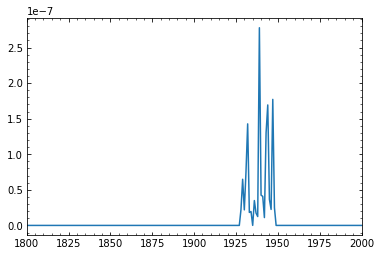

In [60]:
plt.plot(norm_fft[2048])
plt.xlim(1800,2000)

# /home/gemma/Beam/BEAM_leakage_filterk.py
modeified on 03/13, incorporated error normalization

In [92]:
### modified on 03/13. Incorporate error normalization

# # input & Initialize parameters
# if (len(sys.argv)!=9):
#     print('Wrong inputs!')
#     print('Usage: python BEAM_leakage_filterk.py N_screen N_theta_interp screenD sigma angle(deg) truncation(y/n) phase/amp, filter_radius')
#     # ex. python BEAM_leakage_filterk.py 4096 1024 10.0 1.0 3.0 y amp 2.0
#     sys.exit()
# # input parameters
N_screen = 2048
N_theta = 512
D = 10.0
sigma = 1.0
maxdeg = 3.0
trunc = 'y'
option = 'amp'
radius = 2.0
#amp = np.array([0.1, 0.3, 0.6, 1.0, 1.5, 2.0, 3.0, 5.0, 7.0, 10.0, 15.0, 20.0])
amp = np.array([1.0, 2.0]) # test
k_in = np.array([1, 10]) # test
k_in = np.arange(1,52,5)
#radius = np.array([2,4,6,8,10,15,20])
error = np.zeros((len(k_in),len(amp))) #leakage = error^2
noise_norm = np.zeros_like(error)

def gaussian(x, A, sigma, x0): 
    g = A*np.exp(-(x-x0)**2/(2*sigma**2))
    return(g)

def analytical(l, sigma): # blm
    fft = bin_mean0.max()* np.exp(-l*(l+1)*sigma**2/2)
    return(fft)


# unperturbed perfect gaussian create E screen [m]
screen = {}
screen['N'] = N_screen
screen['D'] = D
Initialize(screen)
center = (screen['D']/2, screen['D']/2)
MultByGaussian(screen, center, sigma)
if trunc=='y':
    InCircle(screen, center, 2.0)
ScreenFFT(screen)

# interpolation in sky intensity [rad] (unperturbed beam)
lam = 0.002 #mm wavelength
thetamaxdeg = maxdeg
thetamax = thetamaxdeg*np.pi/180. # in radians
theta_vec = np.linspace(-thetamax,thetamax,N_theta) 
II0 = Project_I_on_thetagrid(theta_vec,screen,lam)   # unperturbed
fft_I0 = np.abs(np.fft.fftshift(np.fft.fft2(np.fft.fftshift(II0)))) # in ell space
theta_vec = np.linspace(0,2*thetamax,N_theta) #rad

#calculate ell
n = theta_vec.shape[0]
dl = 2*np.pi/theta_vec.max() # dl in 1/rad space
l_vec = np.fft.fftshift(dl * np.fft.fftfreq(n)*n)
(l_x, l_y) = np.meshgrid(l_vec,l_vec) # 1/rad 
l = np.sqrt(l_x**2 + l_y**2)

for j in range(len(k_in)):
    kin = k_in[j]
    #kin = 5
    kout = kin + radius
    
    for i in range(len(amp)):
        print('amp =', amp[i], 'k_in =', kin, 'k_out =', kout)
        
        # perturbed E screen
        screen1 = {}
        screen1['N'] = N_screen
        screen1['D'] = D
        Initialize(screen1)
        MultByGaussian(screen1, center, sigma)
        if trunc=='y':
            InCircle(screen1, center, 2.0)

        if option=='phase':
            emap_E = filter_annulus_phase(screen1, amp[i], kin, kout)
        elif option=='amp':
            emap_E = filter_annulus_amp(screen1, amp[i], kin, kout)
        else: print('Choose phase or amplitude errors')

        ScreenFFT(screen1)

        # interpolate the perturbed beam 
        theta_vec = np.linspace(-thetamax,thetamax,N_theta) 
        II1 = Project_I_on_thetagrid(theta_vec, screen1, lam) # perturbed
        # shift the beam from being centered at theta=0 to theta=thetamax so that the beam spans from 0 deg to 2*thetamax deg
        theta_vec = np.linspace(0,2*thetamax,N_theta) #rad

        # FT of sky intensity
        I_diff = II1 - II0 # take the difference in theta space (sky)
        fft_Idiff = np.abs(np.fft.fftshift(np.fft.fft2(np.fft.fftshift(I_diff)))) # FFT the difference to ell space
        fft_I1 = np.abs(np.fft.fftshift(np.fft.fft2(np.fft.fftshift(II1)))) # in ell space

        # average (FT of II0)^2 radially 
        bin_edges = np.linspace(0,l.max(),int(len(theta_vec)/2))
        l_flatten = l.flatten()
        fft_numerical0 = fft_I0.flatten()
        #fft_numerical1 = fft_I1.flatten()
        fft_numerical_diff = fft_Idiff.flatten()
        bin_mean0, bin_edge, bin_num = binned_statistic(l_flatten, fft_numerical0, statistic='mean', bins=bin_edges) 
        #bin_mean1, bin_edge, bin_num = binned_statistic(l_flatten, fft_numerical1, statistic='mean', bins=bin_edges) # bin_mean is the binned numerical beam
        bin_mean_diff, bin_edge, bin_num = binned_statistic(l_flatten, fft_numerical_diff, statistic='mean', bins=bin_edges) # bin the beam difference
        l_vec = bin_edges[0:-1] # ell 1D vector

        beam_diff_rela = bin_mean_diff/bin_mean0 # relative beam difference
        error[j,i] = np.mean(beam_diff_rela[1:3])
        print('leakage (error^2) = {}'.format(error[j,i]**2))

        # Calculates the noise level in fourier space (V^2/Hz)
        emap_fft = np.fft.fftshift(np.fft.fft2(np.fft.fftshift(emap_E))) # scaled error map in fourier space
        norm_fft = np.abs(emap_fft**2)/screen1['dk']**2/screen1['N']**4 # V^2/Hz^2
        
        idx = np.where((screen1['kap']<kout) & (screen1['kap']>kin)) # inside the filter
        avg_fft = np.mean(norm_fft[idx]) # V^2/Hz^2
        total_Vf = np.sum(norm_fft)*screen['dk']**2
        rms_sq = np.abs(rms(emap_E)**2)
        print('V^2/Hz^2 = ',total_Vf)
        print('RMS^2 = ', rms_sq)
        noise_norm[j,i] = avg_fft
        print('average error is ', avg_fft)
        print('sum of avg error is', avg_fft * np.pi*(kout**2-kin**2))

# ### write to a csv file
# k_in_output = np.repeat(k_in, len(amp))
# #radius_output = np.repeat(radius, len(amp))
# amp_output = np.tile(amp, len(k_in))
# error_output = (error**2).flatten()
# noise_output = noise_norm.flatten()
# with open('data_leakage_filterk_radius2.csv', 'w') as f:
#     writer = csv.writer(f, delimiter='\t')
#     writer.writerows(zip(k_in_output, amp_output, noise_output, error_output))

# fig = plt.figure(figsize=(10,8))
# cl = ['red', 'orange', 'blue', 'purple']
# for i in range(len(radius)):
#     plt.semilogy(amp, error[i]**2, 'o--', color=cl[i], label='r={}'.format(radius[i]))
# plt.xlabel('error amplitude A') ### not the actual noise level in V^2/Hz
# plt.ylabel('leakage level')
# plt.legend()
# plt.savefig('/home/gemma/Beam/leakage_k.png')

amp = 1.0 k_in = 1 k_out = 3.0
leakage (error^2) = 2.16932111295584e-07
V^2/Hz^2 =  0.0005840825600140868
RMS^2 =  0.0005840825600140867
average error is  2.328877830997156e-05
sum of avg error is 0.0005853108387975038
amp = 2.0 k_in = 1 k_out = 3.0
leakage (error^2) = 3.212370082452704e-06
V^2/Hz^2 =  0.0024802509793355344
RMS^2 =  0.002480250979335535
average error is  9.889357971832272e-05
sum of avg error is 0.0024854667482422338
amp = 1.0 k_in = 6 k_out = 8.0
leakage (error^2) = 1.8542979898739808e-07
V^2/Hz^2 =  0.0021264521710816723
RMS^2 =  0.0021264521710816723
average error is  2.415325046662508e-05
sum of avg error is 0.0021246308783353807
amp = 2.0 k_in = 6 k_out = 8.0
leakage (error^2) = 2.702846441908018e-06
V^2/Hz^2 =  0.00815358139925281
RMS^2 =  0.008153581399252815
average error is  9.261223761077703e-05
sum of avg error is 0.008146597908694824
amp = 1.0 k_in = 11 k_out = 13.0
leakage (error^2) = 5.709893995671549e-07
V^2/Hz^2 =  0.003623290502061128
RMS^2 =  0.003623

In [95]:
print(kin, kout)
idx = np.where((screen1['kap']<kout) & (screen1['kap']>kin))
np.mean(norm_fft[idx])

51 53.0


9.612032977583386e-05

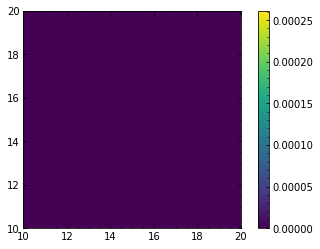

In [91]:
plt.imshow(norm_fft)
plt.xlim(10,20)
plt.ylim(10,20)
plt.colorbar()

In [98]:
# fix area of filter at A = 150, given inner radius, find the corresponding outer radius
def r_out(r_in, A):
    rout = np.sqrt((A/np.pi) + r_in**2)
    return(rout)


# Leakage vs. k - figures generated below were not normalized...
## 1. fix radius r=2, vary k_in

Text(0.5, 1.0, 'width=2')

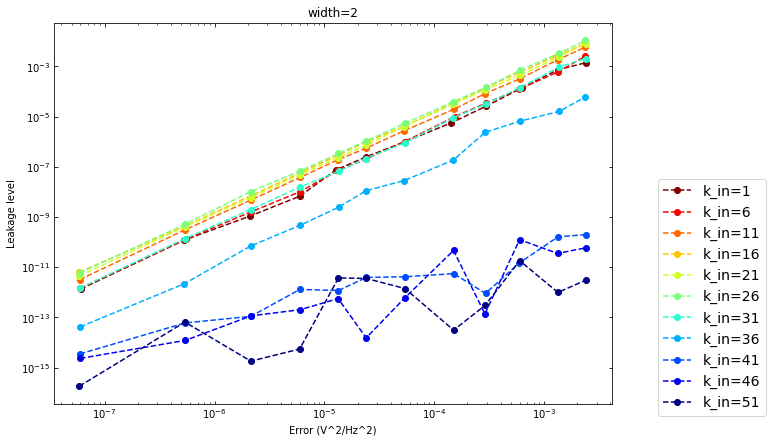

In [5]:
data = np.loadtxt('/Users/zhaoyuhuai/Desktop/SeniorProj/Data/data_k_r2.csv', unpack=True, usecols=(0,1,2,3))
kin = np.arange(1,52,5)
cl=mcp.gen_color(cmap="jet_r",n=len(kin))
plt.figure(figsize=(10,7))
for i in range(len(kin)):
    each_k = (data[0]==kin[i])
    plt.loglog(data[2][each_k], data[3][each_k],'o--',color=cl[i],label='k_in={}'.format(kin[i]))
plt.legend(bbox_to_anchor=(1.07, -0.05),loc="lower left", fontsize = 14)
# plt.xlim(0,10)
# plt.ylim(1e-12,1e-2)
plt.xlabel('Error (V^2/Hz^2)')
plt.ylabel('Leakage level')
plt.title('width=2')

## 2. fix area A=150, scan k_in with varying radius

Text(0.5, 1.0, 'area=150')

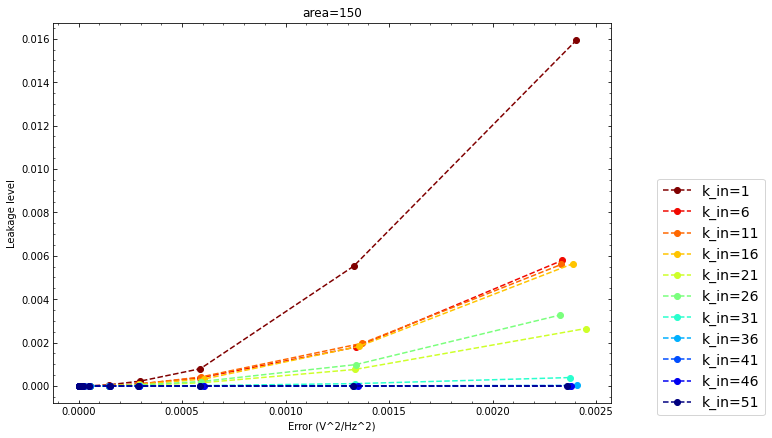

In [12]:
data = np.loadtxt('/Users/zhaoyuhuai/Desktop/SeniorProj/Data/data_k_area150.csv', unpack=True, usecols=(0,1,2,3))
kin = np.arange(1,52,5)
cl=mcp.gen_color(cmap="jet_r",n=len(kin))
plt.figure(figsize=(10,7))
for i in range(len(kin)):
    each_k = (data[0]==kin[i])
    plt.plot(data[2][each_k], data[3][each_k],'o--',color=cl[i],label='k_in={}'.format(kin[i]))
plt.legend(bbox_to_anchor=(1.07, -0.05),loc="lower left", fontsize = 14)
plt.xlabel('Error (V^2/Hz^2)')
plt.ylabel('Leakage level')
plt.title('area=150')

## 3. fix inner radius k_in=5.0, scan k_out

Text(0.5, 1.0, 'k_in=5.0')

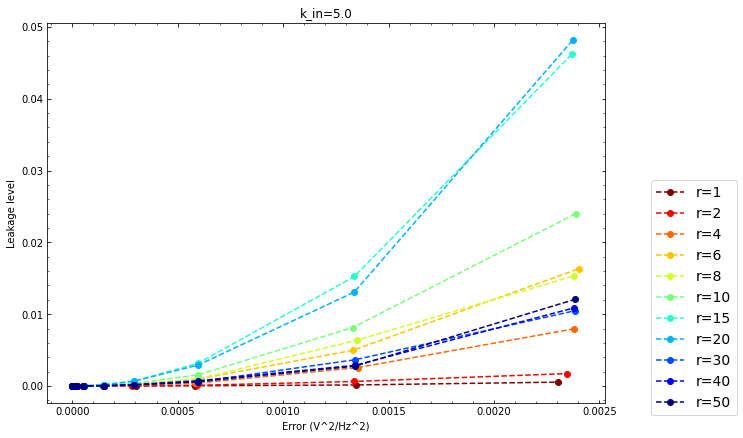

In [19]:
data = np.loadtxt('/Users/zhaoyuhuai/Desktop/SeniorProj/Data/data_k_kin5.0.csv', unpack=True, usecols=(0,1,2,3))
radius = np.array([1,2,4,6,8,10,15,20,30,40,50])
cl=mcp.gen_color(cmap="jet_r",n=len(radius))
plt.figure(figsize=(10,7))
for i in range(len(cl)):
    each_k = (data[0]==radius[i])
    plt.plot(data[2][each_k], data[3][each_k],'o--',color=cl[i],label='r={}'.format(radius[i]))
plt.legend(bbox_to_anchor=(1.07, -0.05),loc="lower left", fontsize = 14)
plt.xlabel('Error (V^2/Hz^2)')
plt.ylabel('Leakage level')
plt.title('k_in=5.0')

Text(0.5, 1.0, 'k_in=10.0')

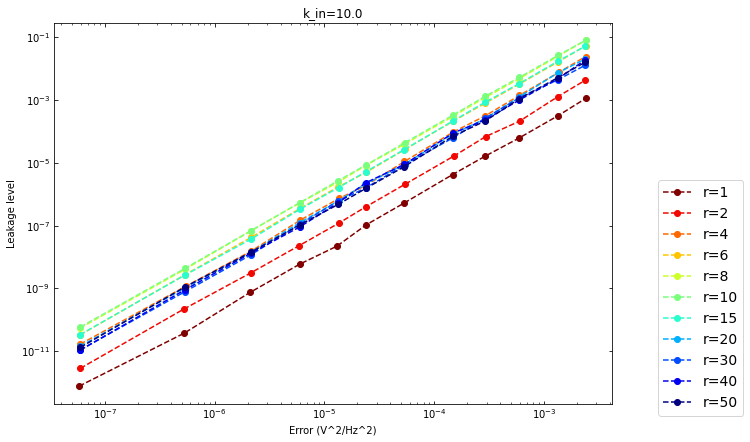

In [7]:
data = np.loadtxt('/Users/zhaoyuhuai/Desktop/SeniorProj/Data/data_k_kin10.0.csv', unpack=True, usecols=(0,1,2,3))
radius = np.array([1,2,4,6,8,10,15,20,30,40,50])
cl=mcp.gen_color(cmap="jet_r",n=len(radius))
plt.figure(figsize=(10,7))
for i in range(len(cl)):
    each_k = (data[0]==radius[i])
    plt.loglog(data[2][each_k], data[3][each_k],'o--',color=cl[i],label='r={}'.format(radius[i]))
plt.legend(bbox_to_anchor=(1.07, -0.05),loc="lower left", fontsize = 14)
plt.xlabel('Error (V^2/Hz^2)')
plt.ylabel('Leakage level')
plt.title('k_in=10.0')

Text(0.5, 1.0, 'k_in=1.0')

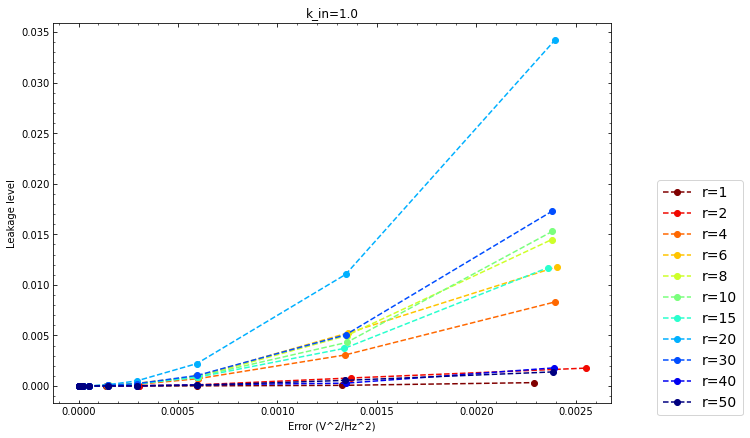

In [12]:
data = np.loadtxt('/Users/zhaoyuhuai/Desktop/SeniorProj/Data/data_k_kin1.0.csv', unpack=True, usecols=(0,1,2,3))
radius = np.array([1,2,4,6,8,10,15,20,30,40,50])
cl=mcp.gen_color(cmap="jet_r",n=len(radius))
plt.figure(figsize=(10,7))
for i in range(len(cl)):
    each_k = (data[0]==radius[i])
    plt.plot(data[2][each_k], data[3][each_k],'o--',color=cl[i],label='r={}'.format(radius[i]))
plt.legend(bbox_to_anchor=(1.07, -0.05),loc="lower left", fontsize = 14)
plt.xlabel('Error (V^2/Hz^2)')
plt.ylabel('Leakage level')
plt.title('k_in=1.0')

# 03/22

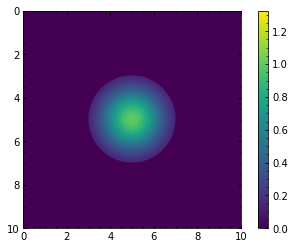

In [21]:
screen = {}
screen['N'] = 2048
screen['D'] = 10
Initialize(screen)
center = (screen['D']/2, screen['D']/2)
MultByGaussian(screen, center, 1.0)
InCircle(screen, center, 2.0)

ScreenFFT(screen)

lam = 0.002 #m wavelength
kphot = 2*np.pi/lam
thetamaxdeg = 3.0
thetamax = 2*np.pi/180. # 2 degrees in radians
theta_vec = np.linspace(-thetamax,thetamax,512) 
#II0 = Project_I_on_thetagrid(theta_vec,screen,lam) 
theta_vec = np.linspace(0, 2*thetamax, 512)

kout = 15
kin = 10
emap_E = filter_annulus_amp(screen, 1.0, kin, kout)


plt.imshow(screen['E'],extent=(0,screen['D'],screen['D'],0))
plt.colorbar()

In [22]:
# Calculates the noise level in fourier space (V^2/Hz)
emap_fft = np.fft.fftshift(np.fft.fft2(np.fft.fftshift(emap_E))) # scaled error map in fourier space
norm_fft = np.abs(emap_fft**2)/screen['dk']**2/screen['N']**4 # V^2/Hz^2

idx = np.where((screen['kap']<kout) & (screen['kap']>kin)) # inside the filter
avg_fft = np.mean(norm_fft[idx]) # V^2/Hz^2
total_Vf = np.sum(norm_fft)*screen['dk']**2
rms_sq = np.abs(rms(emap_E)**2)
print('V^2/Hz^2 = ',total_Vf)
print('RMS^2 = ', rms_sq)
print('average error is ', avg_fft)


V^2/Hz^2 =  0.009407616643504186
RMS^2 =  0.009407616643504193
average error is  2.3938300347913732e-05
sum of avg error is 0.009400548564053972


In [3]:
N_screen = 2048
N_theta = 512
D = 10.0
sigma = 1.0
maxdeg = 10.0
trunc = 'y'
option = 'amp'
radius = 2.0
amp = 5.0
kin = 10
kout = kin+10

def gaussian(x, A, sigma, x0): 
    g = A*np.exp(-(x-x0)**2/(2*sigma**2))
    return(g)

def analytical(l, sigma): # blm
    fft = bin_mean0.max()* np.exp(-l*(l+1)*sigma**2/2)
    return(fft)


# unperturbed perfect gaussian create E screen [m]
screen = {}
screen['N'] = N_screen
screen['D'] = D
Initialize(screen)
center = (screen['D']/2, screen['D']/2)
MultByGaussian(screen, center, sigma)
if trunc=='y':
    InCircle(screen, center, 2.0)
ScreenFFT(screen)

# interpolation in sky intensity [rad] (unperturbed beam)
lam = 0.002 #mm wavelength
thetamaxdeg = maxdeg
thetamax = thetamaxdeg*np.pi/180. # in radians
theta_vec = np.linspace(-thetamax,thetamax,N_theta) 
II0 = Project_I_on_thetagrid(theta_vec,screen,lam)   # unperturbed
fft_I0 = np.abs(np.fft.fftshift(np.fft.fft2(np.fft.fftshift(II0)))) # in ell space
theta_vec = np.linspace(0,2*thetamax,N_theta) #rad

#calculate ell
n = theta_vec.shape[0]
dl = 2*np.pi/theta_vec.max() # dl in 1/rad space
l_vec = np.fft.fftshift(dl * np.fft.fftfreq(n)*n)
(l_x, l_y) = np.meshgrid(l_vec,l_vec) # 1/rad 
l = np.sqrt(l_x**2 + l_y**2)

        
# perturbed E screen
screen1 = {}
screen1['N'] = N_screen
screen1['D'] = D
Initialize(screen1)
MultByGaussian(screen1, center, sigma)
if trunc=='y':
    InCircle(screen1, center, 2.0)
    
if option=='phase':
    emap_E = filter_annulus_phase(screen1, amp, kin, kout)
elif option=='amp':
    emap_E = filter_annulus_amp(screen1, amp, kin, kout)
else: print('Choose phase or amplitude errors')
print('rms = ', np.sqrt(np.mean(emap_E**2)))

ScreenFFT(screen1)

# interpolate the perturbed beam 
theta_vec = np.linspace(-thetamax,thetamax,N_theta) 
II1 = Project_I_on_thetagrid(theta_vec, screen1, lam) # perturbed
II1 = II1 * (np.sum(II0)/np.sum(II1))
# shift the beam from being centered at theta=0 to theta=thetamax so that the beam spans from 0 deg to 2*thetamax deg
theta_vec = np.linspace(0,2*thetamax,N_theta) #rad

# FT of sky intensity
I_diff = II1 - II0 # take the difference in theta space (sky)
fft_Idiff = np.abs(np.fft.fftshift(np.fft.fft2(np.fft.fftshift(I_diff)))) # FFT the difference to ell space
fft_I1 = np.abs(np.fft.fftshift(np.fft.fft2(np.fft.fftshift(II1)))) # in ell space

# average (FT of II0)^2 radially 
bin_edges = np.linspace(0,l.max(),int(len(theta_vec)/2))
l_flatten = l.flatten()
fft_numerical0 = fft_I0.flatten()
fft_numerical1 = fft_I1.flatten()
fft_numerical_diff = fft_Idiff.flatten()
bin_mean0, bin_edge, bin_num = binned_statistic(l_flatten, fft_numerical0, statistic='mean', bins=bin_edges) 
bin_mean1, bin_edge, bin_num = binned_statistic(l_flatten, fft_numerical1, statistic='mean', bins=bin_edges) # bin_mean is the binned numerical beam
bin_mean_diff, bin_edge, bin_num = binned_statistic(l_flatten, fft_numerical_diff, statistic='mean', bins=bin_edges) # bin the beam difference
l_vec = bin_edges[0:-1] # ell 1D vector

beam_diff_rela = bin_mean_diff/bin_mean0 # relative beam difference
#error = np.mean(beam_diff_rela[1:3]) #for maxdeg=3.0
error = np.mean(beam_diff_rela[4])

# Calculates the noise level in fourier space (V^2/Hz)
emap_fft = np.fft.fftshift(np.fft.fft2(np.fft.fftshift(emap_E))) # scaled error map in fourier space
norm_fft = np.abs(emap_fft**2)/screen1['dk']**2/screen1['N']**4 # V^2/Hz^2

idx = np.where((screen1['kap']<kout) & (screen1['kap']>kin)) # inside the filter
avg_fft = np.mean(norm_fft[idx]) # V^2/Hz^2
total_Vf = np.sum(norm_fft)*screen['dk']**2
rms_sq = np.abs(rms(emap_E)**2)
print('V^2/Hz^2 = ',total_Vf)
print('RMS^2 = ', rms_sq)
print('average error is ', avg_fft)
print('leakage (error^2) = {}'.format(error**2))


print(np.sum(II0))
print(np.sum(II1))
# # plot the difference
# fig = plt.figure(figsize=(27,5))
# plt.subplot(1,5,1) # plot the beam difference fft_Idiff - take the difference in theta space, then FFT
# plt.imshow(fft_Idiff, interpolation=None) 
# plt.colorbar()
# plt.title('Beam difference (ell space)')
# plt.subplot(1,5,2) # plot the beam difference fft_Idiff and zoom in at the center 
# plt.imshow(fft_Idiff, interpolation=None) 
# plt.colorbar()
# plt.xlim(int(N_theta*0.43),int(N_theta*0.57))
# plt.ylim(int(N_theta*0.43),int(N_theta*0.57))
# plt.subplot(1,5,3) # plot the power spectrum of the numerical and analytical beam in ell space respectively, and compare to the theory
# plt.plot(l_vec,bin_mean0,color='blue', lw=2, label='binned unperturbed') 
# plt.plot(l_vec,bin_mean1,color='red', lw=2, label='binned perturbed')
# plt.xlabel(r'$\ell$')
# #plt.plot(bin_edges, analytical(bin_edges, fit[1]), color='black', lw=3, ls=':', label='analytical blm')
# plt.xlim(0,2e4)
# plt.legend()
# plt.subplot(1,5,4) # plot the power spectrum of the beam difference in log scale - take the difference and then FFT
# plt.semilogy(l_vec,bin_mean_diff, 'o--', ms=3, color='black', label='difference') 
# plt.xlabel(r'$\ell$')
# plt.legend()
# #plt.xlim(-10,2e4)
# plt.subplot(1,5,5) # # plot the power spectrum of the relative beam difference in log scale by dividing the beam difference by the numerical unperturbed beam
# plt.semilogy(l_vec,bin_mean_diff/bin_mean0,'o--', color='black', label='difference/unperturbed') 
# plt.xlabel(r'$\ell$')
# plt.legend()
# plt.xlim(-10,2200)
# plt.legend()
# plt.show()

rms =  0.7471157341492479
V^2/Hz^2 =  0.5581819202133702
RMS^2 =  0.5581819202133697
average error is  0.0005923111267708194
leakage (error^2) = 0.022561560879083672
52181700253.76439
78638141675.36685


In [7]:

print(np.sum(II0))
print(np.sum(II1))

52181700253.76439
77883389629.8257


# phase:
## fix radius=2, vary $k_{in}$ from 1 to 51


Text(0.5, 1.0, 'width=2')

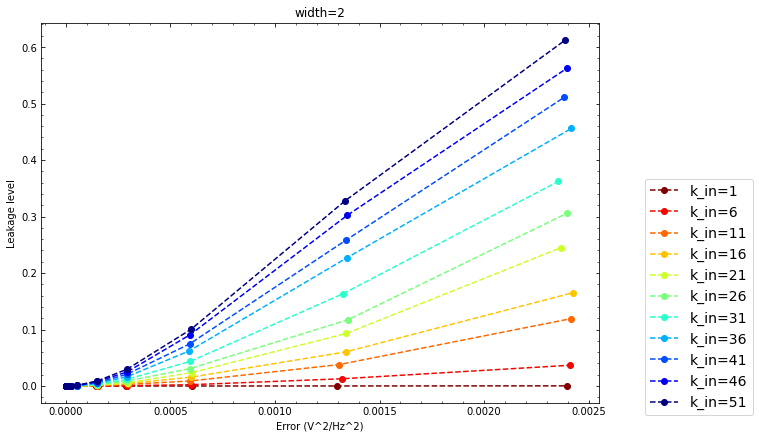

In [6]:
data = np.loadtxt('/Users/zhaoyuhuai/Desktop/SeniorProj/Data/data_phs_k_r2.csv', unpack=True, usecols=(0,1,2,3))
kin = np.arange(1,52,5)
cl=mcp.gen_color(cmap="jet_r",n=len(kin))
plt.figure(figsize=(10,7))
for i in range(len(kin)):
    each_k = (data[0]==kin[i])
    plt.plot(data[2][each_k], data[3][each_k],'o--',color=cl[i],label='k_in={}'.format(kin[i]))
plt.legend(bbox_to_anchor=(1.07, -0.05),loc="lower left", fontsize = 14)
# plt.xlim(0,10)
# plt.ylim(1e-12,1e-2)
plt.xlabel('Error (V^2/Hz^2)')
plt.ylabel('Leakage level')
plt.title('width=2')

## fix radius=5, vary $k_{in}$ from 1 to 51

Text(0.5, 1.0, 'width=5')

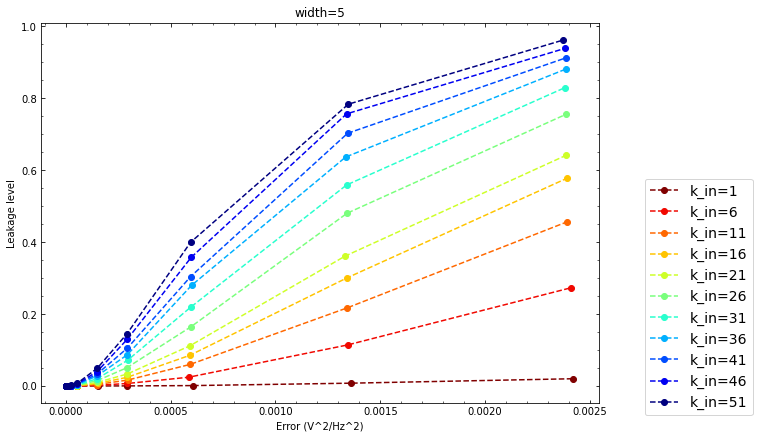

In [8]:
data = np.loadtxt('/Users/zhaoyuhuai/Desktop/SeniorProj/Data/data_phs_k_r5.csv', unpack=True, usecols=(0,1,2,3))
kin = np.arange(1,52,5)
cl=mcp.gen_color(cmap="jet_r",n=len(kin))
plt.figure(figsize=(10,7))
for i in range(len(kin)):
    each_k = (data[0]==kin[i])
    plt.plot(data[2][each_k], data[3][each_k],'o--',color=cl[i],label='k_in={}'.format(kin[i]))
plt.legend(bbox_to_anchor=(1.07, -0.05),loc="lower left", fontsize = 14)
# plt.xlim(0,10)
# plt.ylim(1e-12,1e-2)
plt.xlabel('Error (V^2/Hz^2)')
plt.ylabel('Leakage level')
plt.title('width=5')

## fix $k_{in}=5.0$, vary the radius from 1 to 50

Text(0.5, 1.0, 'k_in=5.0')

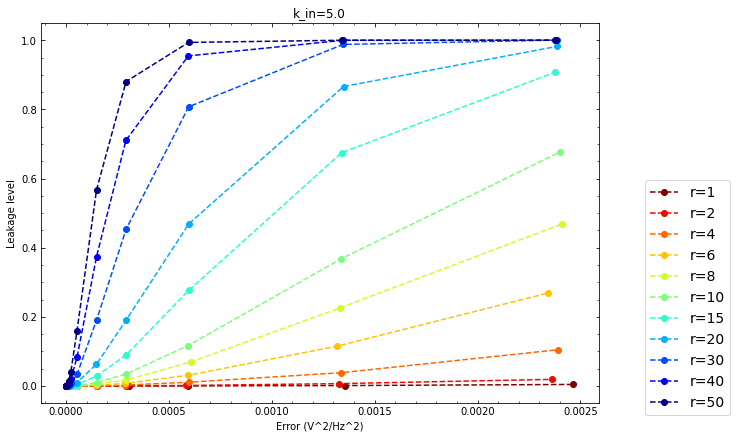

In [19]:
data = np.loadtxt('/Users/zhaoyuhuai/Desktop/SeniorProj/Data/data_phs_k_kin5.0.csv', unpack=True, usecols=(0,1,2,3))
radius = np.array([1,2,4,6,8,10,15,20,30,40,50])
cl=mcp.gen_color(cmap="jet_r",n=len(radius))
plt.figure(figsize=(10,7))
for i in range(len(cl)):
    each_k = (data[0]==radius[i])
    plt.plot(data[2][each_k], data[3][each_k],'o--',color=cl[i],label='r={}'.format(radius[i]))
plt.legend(bbox_to_anchor=(1.07, -0.05),loc="lower left", fontsize = 14)
plt.xlabel('Error (V^2/Hz^2)')
plt.ylabel('Leakage level')
plt.title('k_in=5.0')

## fix $k_{in}=1.0$, vary the radius from 1 to 50

Text(0.5, 1.0, 'k_in=1.0')

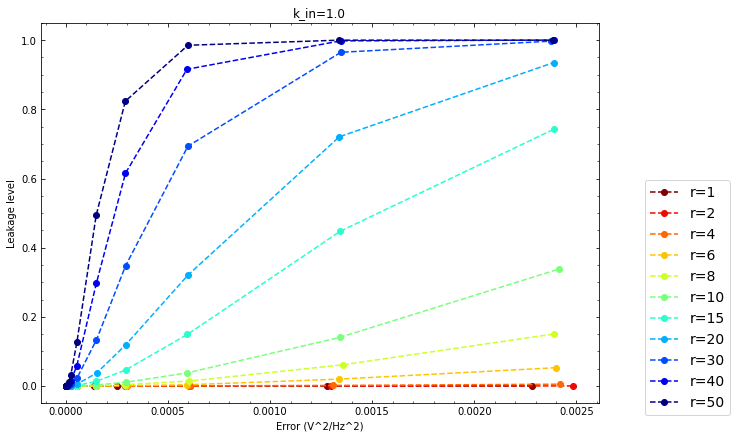

In [25]:
data = np.loadtxt('/Users/zhaoyuhuai/Desktop/SeniorProj/Data/data_phs_k_kin1.0.csv', unpack=True, usecols=(0,1,2,3))
radius = np.array([1,2,4,6,8,10,15,20,30,40,50])
cl=mcp.gen_color(cmap="jet_r",n=len(radius))
plt.figure(figsize=(10,7))
for i in range(len(cl)):
    each_k = (data[0]==radius[i])
    plt.plot(data[2][each_k], data[3][each_k],'o--',color=cl[i],label='r={}'.format(radius[i]))
plt.legend(bbox_to_anchor=(1.07, -0.05),loc="lower left", fontsize = 14)
plt.xlabel('Error (V^2/Hz^2)')
plt.ylabel('Leakage level')
plt.title('k_in=1.0')

## fix $k_{in}=10.0$, vary the radius from 1 to 50

Text(0.5, 1.0, 'k_in=10.0')

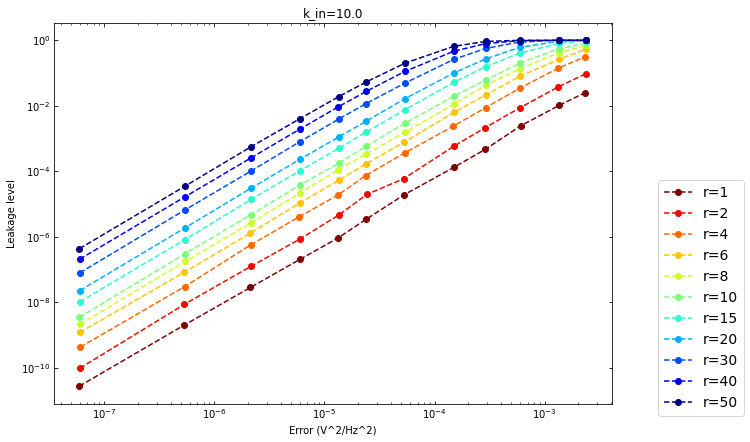

In [28]:
data = np.loadtxt('/Users/zhaoyuhuai/Desktop/SeniorProj/Data/data_phs_k_kin10.0.csv', unpack=True, usecols=(0,1,2,3))
radius = np.array([1,2,4,6,8,10,15,20,30,40,50])
cl=mcp.gen_color(cmap="jet_r",n=len(radius))
plt.figure(figsize=(10,7))
for i in range(len(cl)):
    each_k = (data[0]==radius[i])
    plt.loglog(data[2][each_k], data[3][each_k],'o--',color=cl[i],label='r={}'.format(radius[i]))
plt.legend(bbox_to_anchor=(1.07, -0.05),loc="lower left", fontsize = 14)
plt.xlabel('Error (V^2/Hz^2)')
plt.ylabel('Leakage level')
plt.title('k_in=10.0')

## fix radius=1.0, vary $k_{in}$ from 1 to 71

Text(0.5, 1.0, 'width=1')

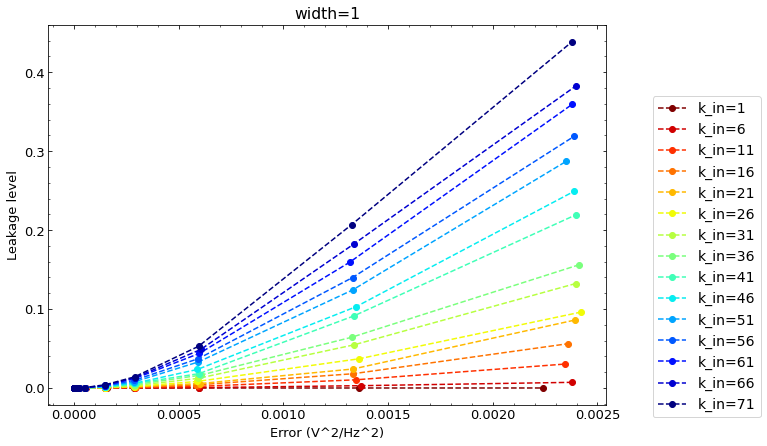

In [34]:
data = np.loadtxt('/Users/zhaoyuhuai/Desktop/SeniorProj/Data/data_phs_k_r1.csv', unpack=True, usecols=(0,1,2,3))
kin = np.arange(1,72,5)
cl=mcp.gen_color(cmap="jet_r",n=len(kin))
plt.figure(figsize=(10,7))
for i in range(len(kin)):
    each_k = (data[0]==kin[i])
    plt.plot(data[2][each_k], data[3][each_k],'o--',color=cl[i],label='k_in={}'.format(kin[i]))
plt.legend(bbox_to_anchor=(1.07, -0.05),loc="lower left", fontsize = 14)
# plt.xlim(0,10)
# plt.ylim(1e-12,1e-2)
plt.xlabel('Error (V^2/Hz^2)')
plt.ylabel('Leakage level')
plt.title('width=1')

# 04/04 replot leakage vs. noise

Text(0.5, 0, 'Error Amplitude')

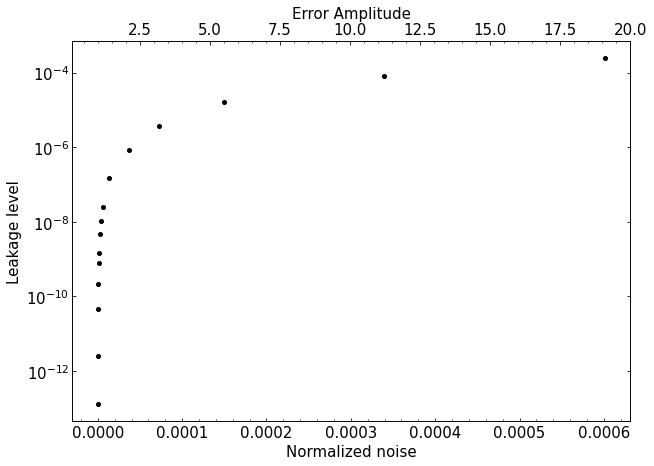

In [4]:
# amp
(A, leak, noise) = np.loadtxt('/Users/zhaoyuhuai/Desktop/SeniorProj/Data/data_replot_1.csv', unpack=True, usecols=(0,1,2))
fig = plt.figure(figsize=(10,7))
ax1 = fig.add_subplot(111)
ax2 = ax1.twiny()
ax1.semilogy(noise, leak, 'o', ms=4, color='black')
ax1.set_xlabel('Normalized noise')
ax1.set_ylabel('Leakage level')
ax2.set_xlim(A.min(), A.max())
ax2.set_xlabel('Error Amplitude')
#plt.show()
#plt.savefig('/home/gemma/Beam/replot2.png')

Text(0.5, 0, 'Error Amplitude')

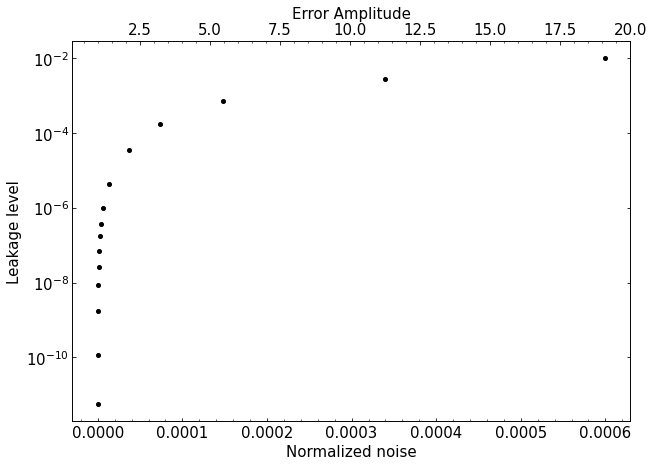

In [5]:
# phase
(B, leak, noise) = np.loadtxt('/Users/zhaoyuhuai/Desktop/SeniorProj/Data/data_replot_2.csv', unpack=True, usecols=(0,1,2))
fig = plt.figure(figsize=(10,7))
ax1 = fig.add_subplot(111)
ax2 = ax1.twiny()
ax1.semilogy(noise, leak, 'o', ms=4, color='black')
ax1.set_xlabel('Normalized noise')
ax1.set_ylabel('Leakage level')
ax2.set_xlim(B.min(), B.max())
ax2.set_xlabel('Error Amplitude')
#plt.show()
#plt.savefig('/home/gemma/Beam/replot2.png')